# Problem set 2

 Peijin Li

Analyze a dataset of New York City AirBnB listings scraped in March 2020. Your task will be to predict the price of an AirBnB listing. 

In [2]:
# Data Management/Investigation
import pandas as pd
import numpy as np
import missingno as miss
import seaborn as sns## implement a maploptlib thing 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.datasets import load_boston

In [3]:
### Read in data
AirBnB = pd.read_csv("nyc_airbnb_listings.csv")
AirBnB.head()

,caller_phone,violation_date,consumer_area_code,subject,is_robocall
0,9495063579,2020-03-30 14:07:00,858,Other,N
1,8443555004,2020-03-19 21:46:00,479,No Subject Provided,Y
2,8005256699,2020-03-30 18:47:00,619,Other,Y
3,9152680729,2020-03-19 17:35:00,479,No Subject Provided,Y
4,7186535424,2020-03-19 11:42:00,479,No Subject Provided,Y


### 1.Examine the dataset and discuss the following:
(a) Attribute types
(b) Dimensionality
(c) Missing values
(d) Potential multicollinearity

(a) Attribute types 

In [3]:
print(AirBnB.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50796 entries, 0 to 50795
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   listing_id                   50796 non-null  int64  
 1   host_id                      50796 non-null  int64  
 2   host_response_rate           31790 non-null  float64
 3   host_acceptance_rate         36781 non-null  float64
 4   host_is_superhost            50791 non-null  float64
 5   host_listings_count          50791 non-null  float64
 6   host_total_listings_count    50791 non-null  float64
 7   host_has_profile_pic         50791 non-null  float64
 8   host_identity_verified       50791 non-null  float64
 9   neighbourhood_group          50796 non-null  object 
 10  room_type                    50796 non-null  object 
 11  accommodates                 50796 non-null  int64  
 12  bathrooms                    50742 non-null  float64
 13  bedrooms        

(b) Dimensionality

In [4]:
AirBnB.shape

(50796, 36)

(c) Missing values

In [5]:
## count the number of nulls
AirBnB.isnull().sum()

listing_id                         0
host_id                            0
host_response_rate             19006
host_acceptance_rate           14015
host_is_superhost                  5
host_listings_count                5
host_total_listings_count          5
host_has_profile_pic               5
host_identity_verified             5
neighbourhood_group                0
room_type                          0
accommodates                       0
bathrooms                         54
bedrooms                          77
beds                             482
price                              0
security_deposit               17325
cleaning_fee                   10528
guests_included                    0
extra_people                       0
has_availability                   0
availability_30                    0
availability_60                    0
availability_90                    0
availability_365                   0
number_of_reviews                  0
number_of_reviews_ltm              0
r

<AxesSubplot:>

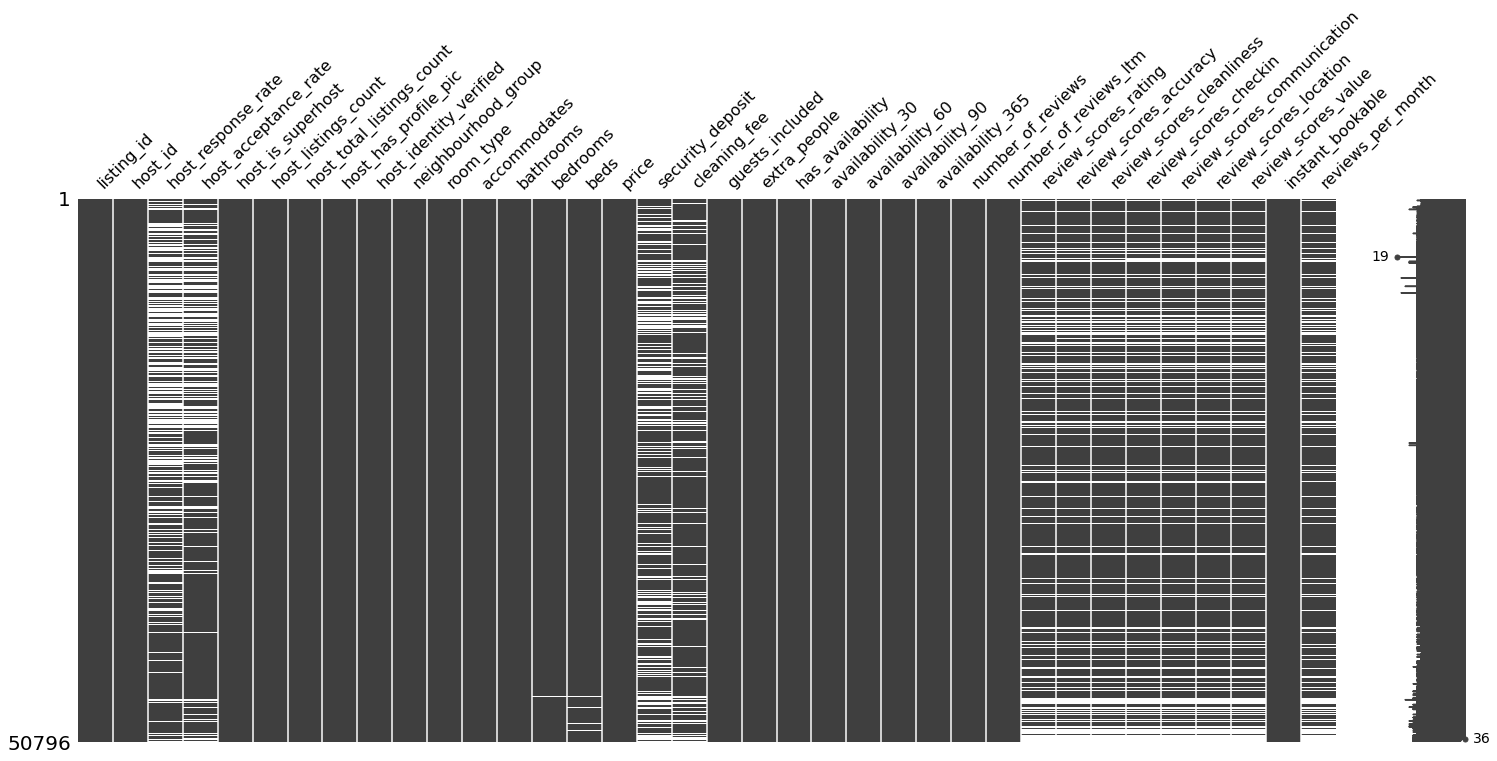

In [6]:
miss.matrix(AirBnB)

(d) Potential multicollinearity

In [7]:
AirBnB.corr()

,listing_id,host_id,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,accommodates,...,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month
listing_id,1.000000,0.602992,0.001262,0.173659,-0.018315,0.095601,0.095601,-0.008842,-0.378890,0.061642,...,-0.021945,-0.020767,-0.051783,0.013608,-0.072445,-0.084298,0.036115,-0.015834,0.301018,0.239285
host_id,0.602992,1.000000,-0.006617,0.204172,-0.024815,0.005862,0.005862,-0.032739,-0.477734,0.080800,...,0.055112,-0.112733,-0.124457,-0.031832,-0.117417,-0.137721,-0.036859,-0.097275,0.285985,0.265653
host_response_rate,0.001262,-0.006617,1.000000,0.351554,0.184319,0.056084,0.056084,0.028286,-0.007838,0.045398,...,0.148508,0.085358,0.088140,0.100042,0.079643,0.091062,0.041354,0.073904,0.066077,0.157114
host_acceptance_rate,0.173659,0.204172,0.351554,1.000000,0.212421,0.031606,0.031606,0.027714,-0.130496,0.099578,...,0.290707,-0.024459,-0.001184,0.037585,-0.002236,-0.017243,-0.008994,-0.002376,0.369932,0.341515
host_is_superhost,-0.018315,-0.024815,0.184319,0.212421,1.000000,0.041023,0.041023,0.010434,0.031779,0.068562,...,0.390701,0.195336,0.187935,0.229011,0.148060,0.150062,0.097842,0.185606,0.011973,0.309221
host_listings_count,0.095601,0.005862,0.056084,0.031606,0.041023,1.000000,1.000000,0.006609,-0.046198,-0.016406,...,-0.064539,-0.020771,-0.024317,0.003697,-0.024194,-0.056838,0.003392,-0.057233,0.060790,-0.043061
host_total_listings_count,0.095601,0.005862,0.056084,0.031606,0.041023,1.000000,1.000000,0.006609,-0.046198,-0.016406,...,-0.064539,-0.020771,-0.024317,0.003697,-0.024194,-0.056838,0.003392,-0.057233,0.060790,-0.043061
host_has_profile_pic,-0.008842,-0.032739,0.028286,0.027714,0.010434,0.006609,0.006609,1.000000,0.038597,-0.006434,...,0.011128,0.026317,0.016763,0.019061,0.021232,0.021010,0.004430,0.012378,0.001804,0.011665
host_identity_verified,-0.378890,-0.477734,-0.007838,-0.130496,0.031779,-0.046198,-0.046198,0.038597,1.000000,-0.020823,...,-0.042429,0.072695,0.078814,0.032247,0.074222,0.092728,0.028414,0.065824,-0.200653,-0.157247
accommodates,0.061642,0.080800,0.045398,0.099578,0.068562,-0.016406,-0.016406,-0.006434,-0.020823,1.000000,...,0.104212,-0.000080,-0.010617,0.039792,0.007854,-0.005861,-0.010258,-0.025103,0.031984,0.122069


<AxesSubplot:>

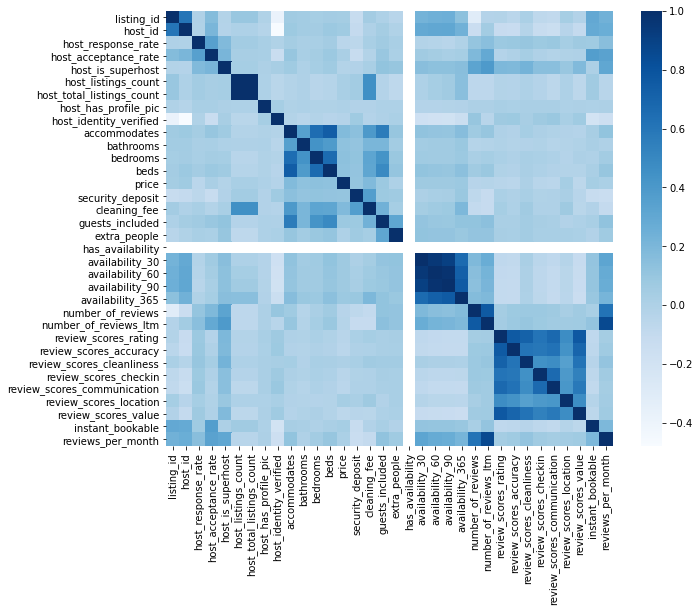

In [8]:
plt.figure(figsize=(10,8))
sns.heatmap(AirBnB.corr(),annot=False,cmap="Blues")

### 2.Preprocess the dataset to eliminate missing values and convert categorical variables to dummy variables. Create a training and test set with 30% of the data held out for testing.

In [9]:
# Drop all observations where the outcome is missing
AirBnB_clean = AirBnB.dropna()

In [10]:
#categorical variables to dummy variables__neighbourhood_group
#Look at the value count.
AirBnB_clean.neighbourhood_group.value_counts()

Manhattan        8555
Brooklyn         8015
Queens           2775
Bronx             573
Staten Island     197
Name: neighbourhood_group, dtype: int64

In [11]:
# collapse the neighbourhood_group categories
AirBnB_clean['Manhattan'] = 1*(AirBnB_clean['neighbourhood_group'] == "Manhattan")
AirBnB_clean['Brooklyn'] = 1*(AirBnB_clean['neighbourhood_group'] == "Brooklyn")
AirBnB_clean['Queens'] = 1*(AirBnB_clean['neighbourhood_group'] == "Queens")
AirBnB_clean['Bronx'] = 1*(AirBnB_clean['neighbourhood_group'] == "Bronx")
# Everyone else ("Staten Island ") is the baseline. 

In [12]:
AirBnB_clean = AirBnB_clean.drop(columns=["neighbourhood_group"])

In [13]:
#categorical variables to dummy variables__room_type
#Look at the value count.
AirBnB_clean.room_type.value_counts()

Entire home/apt    11375
Private room        8103
Shared room          430
Hotel room           207
Name: room_type, dtype: int64

In [14]:
# collapse the room_type categories
AirBnB_clean['Entire_home_apt '] = 1*(AirBnB_clean['room_type'] == "Entire home/apt ")
AirBnB_clean['Private_room'] = 1*(AirBnB_clean['room_type'] == "Private room")
AirBnB_clean['Shared_room '] = 1*(AirBnB_clean['room_type'] == "Shared room ")
# Everyone else ("Hotel room") is the baseline. 

In [15]:
AirBnB_clean = AirBnB_clean.drop(columns=["room_type"])

In [16]:
##reset the index of the df
AirBnB_clean.reset_index(drop=True, inplace=True)
AirBnB_clean.head()

,listing_id,host_id,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,accommodates,...,review_scores_value,instant_bookable,reviews_per_month,Manhattan,Brooklyn,Queens,Bronx,Entire_home_apt,Private_room,Shared_room
0,2595,2845,0.87,0.38,0.0,6.0,6.0,1.0,1.0,2,...,9.0,0,0.38,1,0,0,0,0,0,0
1,5238,7549,1.00,0.26,1.0,4.0,4.0,1.0,1.0,3,...,9.0,0,1.26,1,0,0,0,0,0,0
2,5441,7989,1.00,0.56,1.0,1.0,1.0,1.0,1.0,2,...,10.0,0,1.59,1,0,0,0,0,1,0
3,5552,8380,1.00,0.20,0.0,1.0,1.0,1.0,1.0,2,...,10.0,0,0.51,1,0,0,0,0,0,0
4,5803,9744,1.00,0.99,1.0,3.0,3.0,1.0,1.0,2,...,10.0,0,1.35,0,1,0,0,0,1,0


In [17]:
# Train-Test split (just using Pandas)
#Create a training and test set with 30% of the data held out for testing.
train = AirBnB_clean.sample(frac=.70).reset_index(drop=True)
test = AirBnB_clean.drop(train.index).reset_index(drop=True)

### 3.Define a function called r2 scores() that accepts three arguments, ytrue and ypredicted,and the number of predictors p, and returns a tuple with the R2 and Adjusted R2 scores.

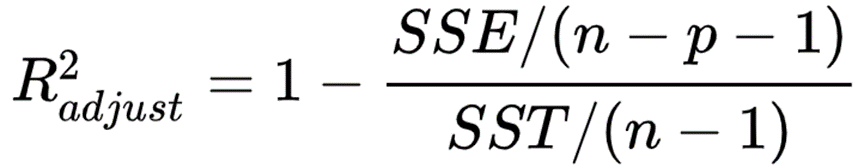

In [18]:
def r2_scores(ytrue,ypredicted,p):
    """
    Argument: ytrue and ypredicted,and the number of predictors p
    Return: a tuple with the R2 and Adjusted R2 scores
    """
    ##calculate R**2
    ytrue_1 = np.array(ytrue["price"])
    ypredicted_1 = np.array(ypredicted)
    r2 = 1 - np.sum((ytrue_1 - ypredicted_1)**2) / np.sum((ytrue_1 - np.mean(ytrue_1))**2)
    ##calculate adjusted R**2
    ytrue_2 = np.array(ytrue["price"])
    ypredicted_2 = np.array(ypredicted)
    r2_adjusted = 1 - (np.sum((ytrue_2 - ypredicted_2)**2)/(len(ytrue_2)-p-1)) / (np.sum((ytrue_2 - np.mean(ytrue_2))**2)/(len(ytrue_2)-1))
    ##create a list to hold R**2 and adjusted R**2
    list = []  
    list.append(r2) ##append 
    list.append(r2_adjusted)
    tuple0=tuple(list)## into tuple form 
    return tuple0

### 4.Fit a linear regression model with all parameters included. Repeat this process using a LASSO regression model using the default alpha of 0.5, and again with an alpha value of 5.0. Discuss the impact of increasing alpha on the number of coefficients that shrink to zero.

STEP 1: Fit a linear regression model with all parameters included.

In [19]:
# Set feature (now use all feautures) and target
X = AirBnB_clean.drop("price", axis=1)
y = AirBnB_clean[["price"]]

In [20]:
# Split data
from sklearn.model_selection import train_test_split
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X, y, test_size=0.3, random_state=0)

In [21]:
# Import class from linear_model module within sklearn
from sklearn.linear_model import LinearRegression
# Instantiate model object
lr = LinearRegression()
# Fit model to training data
lr.fit(X_train_1, y_train_1)

LinearRegression()

In [22]:
#Make predictions
y_train_pred_1 = lr.predict(X_train_1)
y_test_pred_1 = lr.predict(X_test_1)

In [23]:
y_train_pred_1=np.ravel(y_train_pred_1)##remove the extra braces

In [24]:
y_test_pred_1=np.ravel(y_test_pred_1)##remove the extra braces

In [25]:
##MSE
from sklearn.metrics import mean_squared_error
print(f"Train MSE: {mean_squared_error(y_train_1, y_train_pred_1)}")
print(f"Test MSE: {mean_squared_error(y_test_1, y_test_pred_1)}")

Train MSE: 93096.00017031874
Test MSE: 73146.5492876595


In [26]:
##RMSE
print(f"Train RMSE: {np.sqrt(mean_squared_error(y_train_1, y_train_pred_1))}")
print(f"Test RMSE: {np.sqrt(mean_squared_error(y_test_1, y_test_pred_1))}")

Train RMSE: 305.11637152129146
Test RMSE: 270.4561873717432


In [27]:
##R^2
from sklearn.metrics import r2_score
print(f"R squared train: {r2_score(y_train_1, y_train_pred_1)}")
print(f"R squared test: {r2_score(y_test_1, y_test_pred_1)}")

R squared train: 0.1259290333122085
R squared test: 0.1443709821094914


In [28]:
##remove the extra braces
lr_coef=lr.coef_
lr_coef=np.ravel(lr_coef)
lr_coef

array([ 1.13198874e-08,  1.14279544e-07, -9.32755146e+01,  2.17889956e+01,
        4.52441262e+00, -2.56638165e-02, -2.56638164e-02,  6.05166858e+01,
        9.94428916e+00,  2.19717584e+01,  6.17265510e+01,  3.10414824e+01,
       -1.28241781e+01,  3.82171837e-02,  3.50381856e-01, -5.55812698e-01,
       -6.17972677e-02,  1.42108547e-14,  1.51769532e-01,  6.46641066e-01,
       -1.45092463e-01,  3.02296918e-02, -2.72720322e-02, -6.76813128e-01,
       -1.11598662e+00, -2.58308361e+00,  3.12240831e+01, -9.03109420e+00,
       -7.76020657e+00,  4.09408032e+01, -2.19128945e+01,  1.13502985e+01,
        3.96497711e+00,  1.15729229e+02,  4.94965097e+01,  2.65273993e+01,
        2.76248341e+01,  0.00000000e+00, -1.82799274e+01,  0.00000000e+00])

STEP 2: Repeat this process using a LASSO regression model using the default alpha of 0.5

In [29]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.5)

In [30]:
# Set feature (now use all feautures) and target
X = AirBnB_clean.drop("price", axis=1)
y = AirBnB_clean[["price"]]

In [31]:
# Split data
from sklearn.model_selection import train_test_split
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X, y, test_size=0.3, random_state=0)

In [32]:
# Instantiate Lasso object instead of LinearRegression, set alpha
lasso_2 = Lasso(alpha=0.5)

In [33]:
# Fit model to training data
lasso_2.fit(X_train_2, y_train_2)

Lasso(alpha=0.5)

In [34]:
y_train_pred_2 = lasso_2.predict(X_train_2)
y_test_pred_2 = lasso_2.predict(X_test_2)

In [35]:
# Evaluate model: MSE
print(f"Train MSE: {mean_squared_error(y_train_2, y_train_pred_2)}")
print(f"Test MSE: {mean_squared_error(y_test_2, y_test_pred_2)}")

Train MSE: 93161.73354562752
Test MSE: 73076.61145373013


In [36]:
##R^2
print(f"R squared train: {r2_score(y_train_2, y_train_pred_2)}")
print(f"R squared test: {r2_score(y_test_2, y_test_pred_2)}")

R squared train: 0.12531186786154824
R squared test: 0.14518907729977892


In [37]:
lasso_2.coef=lasso_2.coef_
lasso_2.coef

array([ 1.10516904e-07,  1.13483331e-07, -5.95258090e+01,  0.00000000e+00,
        1.38045890e+00, -5.13003213e-02, -3.14843495e-18,  0.00000000e+00,
        7.66620507e+00,  2.18081504e+01,  5.84424061e+01,  2.92595476e+01,
       -1.13790932e+01,  3.88996620e-02,  3.75535515e-01, -0.00000000e+00,
       -6.48994606e-02,  0.00000000e+00,  2.24205353e-01,  6.01321678e-01,
       -1.56382036e-01,  3.19530842e-02, -1.27071343e-02, -5.91663913e-01,
       -1.23810942e+00, -1.23007236e+00,  2.98777905e+01, -8.26706093e+00,
       -7.17785333e+00,  3.92510702e+01, -2.04371580e+01,  1.09637828e+01,
        3.20948082e+00,  8.12767713e+01,  1.47941295e+01, -3.14401721e+00,
       -0.00000000e+00,  0.00000000e+00, -1.45605451e+01,  0.00000000e+00])

STEP 3: Repeat this process using a LASSO regression model using the default alpha of 5.0

In [38]:
lasso = Lasso(alpha=5.0)
# Set feature (now use all feautures) and target
X = AirBnB_clean.drop("price", axis=1)
y = AirBnB_clean[["price"]]

In [39]:
# Split data
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X, y, test_size=0.3, random_state=0)
# Instantiate Lasso object instead of LinearRegression, set alpha
lasso_3 = Lasso(alpha=5.0)

In [40]:
# Fit model to training data
lasso_3.fit(X_train_3, y_train_3)

Lasso(alpha=5.0)

In [41]:
y_train_pred_3 = lasso_3.predict(X_train_3)
y_test_pred_3 = lasso_3.predict(X_test_3)

In [42]:
# Evaluate model: MSE
print(f"Train MSE: {mean_squared_error(y_train_3, y_train_pred_3)}")
print(f"Test MSE: {mean_squared_error(y_test_3, y_test_pred_3)}")

Train MSE: 94166.80829494992
Test MSE: 73593.06651290593


In [43]:
##R^2
print(f"R squared train: {r2_score(y_train_3, y_train_pred_3)}")
print(f"R squared test: {r2_score(y_test_3, y_test_pred_3)}")

R squared train: 0.11587530070370577
R squared test: 0.13914786360794285


In [44]:
lasso_3.coef=lasso_3.coef_
lasso_3.coef

array([ 3.22158658e-07,  1.18936361e-07, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -5.08447569e-02, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  2.06936110e+01,  3.10251948e+01,  1.58852095e+01,
       -0.00000000e+00,  4.31583160e-02,  5.35604390e-01,  0.00000000e+00,
       -5.53347182e-02,  0.00000000e+00,  5.31332632e-01,  3.19899613e-01,
       -9.51002867e-02,  3.73352054e-02, -0.00000000e+00, -4.27701389e-01,
       -2.00884471e+00, -0.00000000e+00,  1.60725011e+01, -0.00000000e+00,
       -0.00000000e+00,  2.40344730e+01, -3.78568112e+00,  0.00000000e+00,
        0.00000000e+00,  5.54347232e+01, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00])

STEP 4:Discuss the impact of increasing alpha on the number of coefficients that shrink to zero.

According to the coefficients of the regressions, we could see that more coefficients of the estimators shrink to zero as alpha increases.

### 5.Using the r2 scores() function you defined, compute and discuss the scores for the linear regression and LASSO models.

STEP 1:Compute the scores for the linear regression and LASSO models.

In [45]:
##calculate the number of coefficients
#print(len(list(np.ravel(lr.coef_))))## p=40
## r2_scores of linear regression
r2_scores(y_train_1, y_train_pred_1, 40)

(0.1259290333122085, 0.12343862525839333)

In [46]:
r2_scores(y_test_1, y_test_pred_1, 40)

(0.1443709821094914, 0.13866107875353206)

In [47]:
##calculate the number of coefficients
#print(len(lasso_2.coef_))## p=40
## r2_scores of LASSO 0.5
r2_scores(y_train_2, y_train_pred_2, 40)

(0.12531186786154824, 0.12281970137636145)

In [48]:
r2_scores(y_test_2, y_test_pred_2, 40)

(0.14518907729977892, 0.13948463337118233)

In [49]:
##calculate the number of coefficients
#print(len(lasso_3.coef_))## p=40
## r2_scores of LASSO 5.0
r2_scores(y_train_3, y_train_pred_3, 40)

(0.11587530070370577, 0.11335624749679274)

In [50]:
r2_scores(y_test_3, y_test_pred_3, 40)

(0.13914786360794285, 0.13340310460632754)

STEP 2:Discuss the scores for the linear regression and LASSO models.

1)Comparing the train results with the test results, we could find that it scores well on training but poorly on the training set, which means there is overfitting. 
2)Comparing the linear regression result of the Lasson(alpha=0.5), we can see that in Lasson(alpha=0.5), both the R square and Adjusted R square of the testing data regressions become higher than in the linear regression; and the R square and Adjusted R square of the training data regressions become lower than in the linear regression. These trends are consistent with the comparison between Lasson(alpha=0.5) and Lasson(alpha=5.0). 
3)This is because Lasson is more restricted, and we are less likely to overfit. With the increase of alpha, the penalty is more substantial.  

### 6.Create and display a dataframe with the variable names, linear regression coefficients, and LASSO (alpha=5.0) coefficients as columns. Provide an interpretation of the results.

In [51]:
#put linear regression coefficients into df
lr_coef=pd.DataFrame(lr_coef)
##rename the column
lr_coef=lr_coef.rename(columns={0:"lr_coefficients"})
#put LASSO (alpha=5.0) coefficients into df
lasso_3.coef=pd.DataFrame(lasso_3.coef)
##rename the column
lasso_3.coef=lasso_3.coef.rename(columns={0:"lasso5.0_coefficients"})
#put variable names into df
columns=X_train_1.keys()
columns=pd.DataFrame(columns)
##rename the column
columns=columns.rename(columns={0:"variable_names"})

In [52]:
#Create and display a dataframe with the variable names, linear regression coefficients, and LASSO (alpha=5.0) coefficients as columns. 
r_1=pd.concat([columns,lr_coef], axis=1)
r_2=pd.concat([r_1,lasso_3.coef], axis=1)
r_2

,variable_names,lr_coefficients,lasso5.0_coefficients
0,listing_id,1.131989e-08,3.221587e-07
1,host_id,1.142795e-07,1.189364e-07
2,host_response_rate,-9.327551e+01,-0.000000e+00
3,host_acceptance_rate,2.178900e+01,0.000000e+00
4,host_is_superhost,4.524413e+00,-0.000000e+00
5,host_listings_count,-2.566382e-02,-5.084476e-02
6,host_total_listings_count,-2.566382e-02,-0.000000e+00
7,host_has_profile_pic,6.051669e+01,0.000000e+00
8,host_identity_verified,9.944289e+00,0.000000e+00
9,accommodates,2.197176e+01,2.069361e+01


Interpretation of the results:
Compared to linear regression coefficients, more coefficients in the lasso5.0 regression shrink to zero. This is because lasso5.0 adds the penalty by getting involved with an inequation of the coefficients. Using lasso5.0, we could rank the features and get rid of some of the variables to reduce the complexity of the model. 

Lasso5.0 also decreases collinearity in the regression. In this example, according to the correlation study between different variables, we could see that the variable of "bedrooms" and "beds" are highly correlated, and in the regression of lasso5.0, the coefficient of "beds" shrink to zero.